# <center>Metody Numeryczne</center>

# Laboratorium 6: Iteracyjne równania liniowe i macierze rzadkie


**Wykonał:** Adrian Knapik

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.


Dana jest prostokątna, [rzadka](https://en.wikipedia.org/wiki/Sparse_matrix) macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor kolumnowy zmiennych,
- $\mathbf{b}$ - wektor kolumnowy wyników prawej strony równania. 

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W macierzach rzadkich większość elementów jest zerami, więc przechowywanie całych macierzy w pamięci jest nieefektywne. W celu optymalizacji macierze te zapisuje się w przeznaczonych do tego [formatach przechowywania danych](https://docs.scipy.org/doc/scipy/reference/sparse.html#usage-information), jakie udostępnia m.in. moduł [`scipy.sparse`](https://docs.scipy.org/doc/scipy/reference/sparse.html). W ramach laboratorium korzystać będziemy z formatu [Compressed Sparse Column (CSC)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_array.html).

1. Zapoznaj się z różnymi formatami przechowywania macierzy rzadkich w pamięci.

2. Dla $10$ równo rozmieszczonych wartości $m$ z zakresu $[100, 10000]$ wygeneruj macierze rzadkie wymiaru $m \times m$ używając [`sp.sparse.random_array()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random_array.html) z parametrem `density=0.01` oraz parametrem `format` ustawionym tak, aby wygenerowane macierze zapisane zostały w formacie CSC.

2. Porównaj ile pamięci zajmują te same macierze zapisane w formacie `numpy.ndarray` oraz w formacie `scipy.sparse.csc_array`. W tym celu przekonwertuj kopie macierzy utworzonych w poprzednim punkcie do formatu `numpy.ndarray` używając odpowiedniej metody z modułu `scipy.sparse`. Wynik zaprezentuj na jednym wykresie typu *scatter plot*.

3. Opisz wnioski wynikające z wykresu.

> **Wskazówka:** Do obliczenia rozmiaru zmiennych skorzystaj z fragmentu kodu podanego poniżej.


In [ ]:
# Fragment kodu wyznaczający ilość zużycia pamięci przez macierze (w bajtach).
n: np.ndarray = ...
n_memory_size = n.nbytes

s: sp.sparse.csc_array = ...
s_memory_size = s.data.nbytes + s.indices.nbytes + s.indptr.nbytes

Text(0.5, 0, 'Rozmiar macierzy')

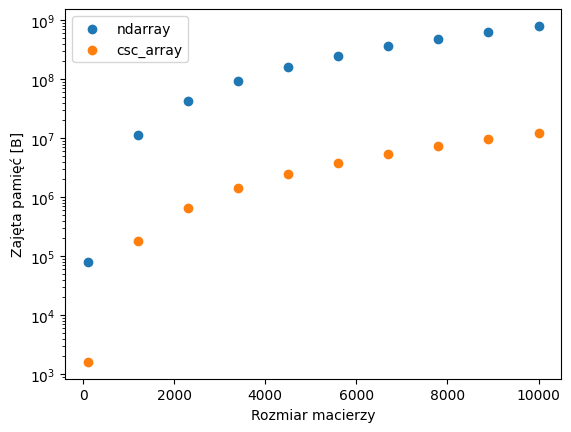

In [50]:
# ===== Twoja implementacja tutaj =====

s_size = []
n_size = []

rozmiary = np.linspace(100,10000,10)

for i in rozmiary:
    i = int(i)
    s = sp.sparse.random_array((i,i),density = 0.01,format = "csc")
    n = s.toarray()
    s_size.append(s.data.nbytes + s.indices.nbytes + s.indptr.nbytes)
    n_size.append(n.nbytes)

plt.scatter(rozmiary,n_size)
plt.yscale("log")
plt.xscale("linear")
plt.scatter(rozmiary,s_size)
plt.legend(["ndarray","csc_array"])
plt.ylabel("Zajęta pamięć [B]")
plt.xlabel("Rozmiar macierzy")

Komentarz:

Tworzymy pętlę, która dla wygenerownych przy pomocy linspace rozmiarów, tworzy macierze. Dla każdego rozmiaru tworzymy w formacie CSC, oraz konwertujemy do ndarray. Następnie mieżymy ilośc zajmowanej pamięci.
Rozmiar macierzy w formacie CSC obliczamy jako sumę bajtów trzech tablic struktury, natomiast dla ndarray korzystamy bezpośrednio z atrybutu nbytes.

Jak można łatwo zauważyć na wykresie, format csc jest znacznie bardziej efektywny pod względem zajmowanej pamieci, jest to prawdziwe dla każdego rozmiaru macierzy. 

---

### **Zadanie 2.**

Korzystając z wiedzy zdobytej podczas realizacji **Zadania 1.** wykonaj polecenia.

1. Wygeneruj macierze rzadkie $\mathbf{A}$ i $\mathbf{B}$ o wymiarach $1000 \times 1000$. Zapisz je w formatach `scipy.sparse.csc_array` oraz `numpy.ndarray`.

2. Porównaj czas potrzebny na wykonanie mnożenia macierzowego $\mathbf{AB}$ dla macierzy zapisanych w formacie `numpy.ndarray` oraz `scipy.sparse.csc_array`.

3. Opisz z czego wynika różnica.

In [ ]:
# ===== Twoja implementacja tutaj =====
A = sp.sparse.random_array((1000,1000),density = 0.01,format = "csc")
Aa = A.toarray()
B = sp.sparse.random_array((1000,1000),density = 0.01,format = "csc")
Ba = B.toarray()

def mnozenie(x,y):
    return x @ y

t = %timeit -r 5 -n 7 -o mnozenie(A,B)
t = %timeit -r 5 -n 7 -o mnozenie(Aa,Ba)


802 μs ± 34.7 μs per loop (mean ± std. dev. of 5 runs, 7 loops each)
22.3 ms ± 1.75 ms per loop (mean ± std. dev. of 5 runs, 7 loops each)


Komentarz:
Tworzymy funkcję realizującą mnożenie macierzowe i wywołujemy ją dla macierzy ndarray i w formacie CSC. Czas mierzymy przy pomocy %timeit.

Rezultaty jasno pokazują, że w przypadku macierzy rzadkich wykonywanie obliczeń na formacie CSC jest znacznie szybsze niż dla zwykłych macierzy.
Mnożenie w formacie CSC wykonało się w 802 mikrosekundy, a dla zwykłych macierzy w 22.3 ms, czyli 22300 mikrosekund. 27 razy więcej!

Różnica ta wynika z tego, że w obu formatach dane zapisane są zupełnie inaczej, więc i inaczej wykonuje się obliczenia. W przypadku zwykłych macierzy musimy dokonać zwykłego mnożenia macierzowego, biorąc pod uwagę każdy element, nawet jeśli są zerami. W przypadku CSC komputer „wie”, gdzie są zera, i może je pominąć przy obliczeniach, co daje o wiele mniejszą liczbę operacji.

---

### **Zadanie 3.**

Aby metody iteracyjne znalazły rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ należy zadbać o to aby macierz $\mathbf{A}$ była [diagonalnie zdominowana](https://en.wikipedia.org/wiki/Diagonally_dominant_matrix). Przekształcenie dowolnej macierzy do tej postaci jest skomplikowanym zagadnieniem, które nie będzie poruszane w ramach tego laboratorium. Na potrzeby zadania należy jedynie sprawdzić czy używana macierz posiada tę własność.

**Punkt 1.**

Zaimplementuj funkcję *`is_diagonally_dominant()`* sprawdzającą czy macierz jest diagonalnie zdominowana.

> **Wskazówka:** W implementacji nie należy używać pętli *for*, ponieważ biblioteka NumPy zawiera funkcje, które znacznie wydajniej iterują po elementach tablic typu `numpy.ndarray`. Lepiej skorzystać z funkcji [`np.sum()`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) oraz [`np.diagonal()`](https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html).

<br>

**Punkt 2.**

Poniżej znajduje się zaimplementowana funkcja `generate_matrix()`. Przy jej pomocy wygeneruj macierz $\mathbf{A}$ o wymiarach $1000 \times 1000$. Następnie zweryfikuj czy wygenerowana macierz jest diagonalnie zdominowana. Wygeneruj również wektor wartości losowych $\mathbf{b}$ o długości $1000$.

<br>

**Punkt 3.**

Istnieje wiele metod iteracyjnego rozwiązywania równań, natomiast nie różnią się one znacząco od siebie w kwestii wywołania metody, dlatego w dalszej części zadania należy wybrać jedną z metod: [GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html) lub [Conjugate Gradient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html) i dla niej przeprowadzić dalszą analizę. 

1. Korzystając z funkcji *`residual_norm()`*, oraz macierzy zdefiniowanych w **Punkcie 2.**, zbadaj wpływ argumentów `rtol` i `maxiter` na działanie wybranej metody. Sporządź wykresy przedstawiające wartość normy residuum w zależności od zmiany podanych parametrów.

2. Opisz zaobserwowane zależności.

>**Wskazówka:** Metoda *Conjugate Gradient* wymaga aby macierz była dodatnio określona. Można to zapewnić poprzez podanie argumentu `is_symmetric=True` do funkcji `generate_matrix()`.


In [54]:
# Implementacja funkcji generate_matrix().

from scipy.sparse import diags_array, csc_array


def generate_matrix(m: int = 1000, is_symmetric: bool = False) -> csc_array:
    """Funkcja generująca rzadką, diagonalnie zdominowaną macierz rozmiaru m x m.

    Parameters:
        m (int): Wymiar macierzy.
        is_symmetric (bool): Czy macierz ma być symetryczna.

    Returns:
        (scipy.sparse.csc_array): Macierz rzadka, diagonalnie zdominowana (m,m).

    Raises:
        TypeError: Jeśli 'm' nie jest liczbą całkowitą lub 'is_symmetric' nie 
            jest wartością logiczną.
        ValueError: Jeśli 'm' jest mniejsze niż 5.
    """
    if not isinstance(m, int):
        raise TypeError(
            f"Argument 'm' musi być liczbą całkowitą, otrzymano: {type(m).__name__}."
        )
    if not isinstance(is_symmetric, bool):
        raise TypeError(
            f"Argument 'is_symmetric' musi być wartością logiczną, otrzymano: {type(is_symmetric).__name__}."
        )
    if m < 5:
        raise ValueError("Argument 'm' musi być większy lub równy 5.")

    if is_symmetric:
        num_upper_diags = np.random.randint(2, m // 2)
        diagonal_values = np.random.rand(num_upper_diags)
        matrix = diags_array(
            diagonal_values, offsets=np.arange(1, num_upper_diags + 1), shape=(m, m)
        )
        matrix = matrix + matrix.T
    else:
        num_upper_diags = np.random.randint(2, m // 2)
        num_lower_diags = np.random.randint(2, m // 2)
        diagonal_values = np.random.rand(num_upper_diags + num_lower_diags)
        matrix = diags_array(
            diagonal_values,
            offsets=np.arange(-num_lower_diags, num_upper_diags),
            shape=(m, m),
        )

    row_sums = np.asarray(matrix.sum(axis=1)).flatten()
    diagonal_vals = row_sums - np.abs(matrix.diagonal()) + np.random.rand(m)
    matrix.setdiag(diagonal_vals)

    return matrix.tocsc()


True


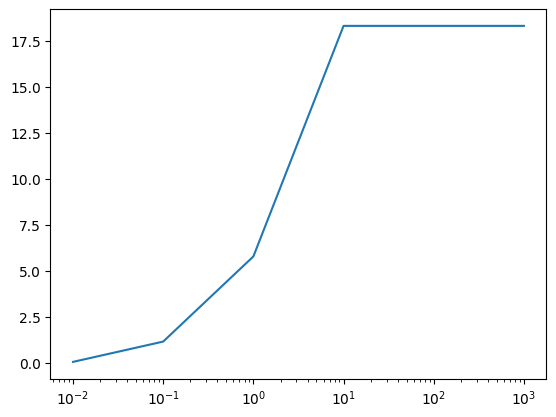

[np.float64(0.0594429617489969), np.float64(1.162777902892078), np.float64(5.791432436868862), np.float64(18.325667992128306), np.float64(18.325667992128306), np.float64(18.325667992128306), np.float64(18.325667992128306)]


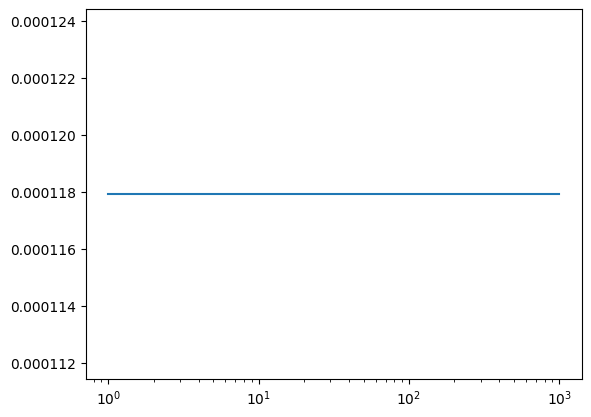

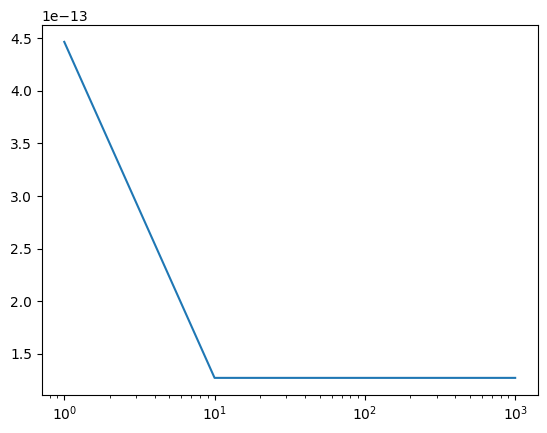

In [ ]:
# ===== Twoja implementacja tutaj =====
values = [0.01, 0.1,1,10,100,500,1000]

A = generate_matrix()
b = np.random.rand(1000)
print(main.is_diagonally_dominant(A))

norm_rtol = []
norm_maxiter = []
norm_maxiter2 = []
for i in values:
    x,info = sp.sparse.linalg.gmres(A,b,rtol = i)
    norm_rtol.append(main.residual_norm(A.toarray(),x,b))

plt.plot(values,norm_rtol)
plt.xscale("log")
plt.show()

for i in values[2:]: # bez floatów
    x,info = sp.sparse.linalg.gmres(A,b,maxiter = i)
    norm_maxiter.append(main.residual_norm(A.toarray(),x,b))

plt.plot(values[2:],norm_maxiter)
plt.xscale("log")
plt.show()

for i in values[2:]: # bez floatów
    x,info = sp.sparse.linalg.gmres(A,b,rtol=1e-14,maxiter = i) #malutki rtol zeby zobaczyc efekt maxitera
    norm_maxiter2.append(main.residual_norm(A.toarray(),x,b))

plt.plot(values[2:],norm_maxiter2)
plt.xscale("log")
plt.show()


Komentarz:

Tworzymy dwie pętle, w których podmieniamy wartości odpowiednio rtol i maxiter. Następnie tworzymy jedną pętlę, w której podmieniamy wartość maxiter dla ustalonej wartości rtol. Należy pamiętać o tym, że maxiter nie przyjmuje wartości typu float.
Normę dla każdego wyniku liczymy przy pomocy residual_norm. By to zrobić, najpierw konwertuję macierze CSC do ndarray, bo na takich operuje ta funkcja.

Zauważone zależności:
Wraz ze wzrostem parametru rtol rośnie norma rezyduum, aż dotrzemy do wartości ustalonej ok. 18.6.      
Przy domyślnej wartości parametru rtol, zmienianie parametru maxiter nie ma żadnego wpływu na normę rezyduum.   
Przy ustawieniu rtol na wartość bardzo małą, zwiększenie wartości maxiter zmniejsza normę rezyduum, aż dotrzemy do wartości ustalonej 0.

Zależności te wynikają z tego, że maxiter oznacza maksymalną ilość iteracji, a rtol oznacza tolerancję w teście konwergencji. Wraz ze wzrostem rtol maleje dokładność. Jeżeli rtol jest zbyt duży, maksymalna ilość iteracji i tak nigdy nie zostanie osiągnięta, więc maxiter nie ma wpływu.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)